# Gran Turismo Folgore

In [ ]:
pip install tensorflow


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00


In [ ]:
pip install torch torchvision

Import needed libraries

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

Preprocess text (username and link placeholders)

In [ ]:
def preprocess(text):
    new_text = []


    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)



Tasks:
emoji, emotion, hate, irony, offensive, sentiment
stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

In [ ]:

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)



download label mapping

In [ ]:

labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]



PT

In [ ]:

model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [ ]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")



1) positive 0.8466
2) neutral 0.1458
3) negative 0.0076


Plot the results

Import needed libraries

In [ ]:
import pandas as pd




In [ ]:
!pip install transformers pandas numpy torch


Import libraries

In [ ]:

import pandas as pd
import numpy as np
import torch
from scipy.special import softmax

In [ ]:
# Replace with the path to your uploaded dataset
dataset_file_path = "/content/FolgoreUPD.xlsx"

# 1. Load your dataset (assuming it is in an Excel format)
df = pd.read_excel(dataset_file_path)

# 2. Preprocess your text (if needed)
def preprocess(Text):
    # Your preprocessing code here
    return Text

# 3. Tokenize your text
text_column_name = "Text"  # Replace with the actual column name containing the text
df["Text"] = df["Text"].apply(preprocess)  # Apply preprocessing to the text column

# Assuming you have already initialized the tokenizer and model in a previous cell
texts = df[text_column_name].tolist()
encoded_inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)

# 4. Make predictions
with torch.no_grad():
    output = model(**encoded_inputs)
scores = output.logits
scores = softmax(scores, axis=1)

# 5. Interpret the results
for i, Text in enumerate(texts):
    ranking = np.argsort(scores[i])  # Sort in ascending order
    for j in range(scores.shape[1]):
        label = labels[ranking[j]]
        score = scores[i][ranking[j]].item()
        print(f"{i+1}) {Text} | {label}: {score:.4f}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


1) Set to be available later this year, the GranTurismo Folgore will be launched alongside a petrol version of the car | negative: 0.0028
1) Set to be available later this year, the GranTurismo Folgore will be launched alongside a petrol version of the car | positive: 0.1834
1) Set to be available later this year, the GranTurismo Folgore will be launched alongside a petrol version of the car | neutral: 0.8139
2) Italian sports car brand Maserati has presented a customised version of it first fully-electric car, the GranTurism | negative: 0.0036
2) Italian sports car brand Maserati has presented a customised version of it first fully-electric car, the GranTurism | positive: 0.3980
2) Italian sports car brand Maserati has presented a customised version of it first fully-electric car, the GranTurism | neutral: 0.5985
3) Who doesn't love speed? 🏎️⚡ With the Maserati GranTurismo Folgore, you can go from 0 to 100km/h in jus 2.7 seconds | negative: 0.0101
3) Who doesn't love speed? 🏎️⚡ With t

# Plot

Final Plot (maybe)

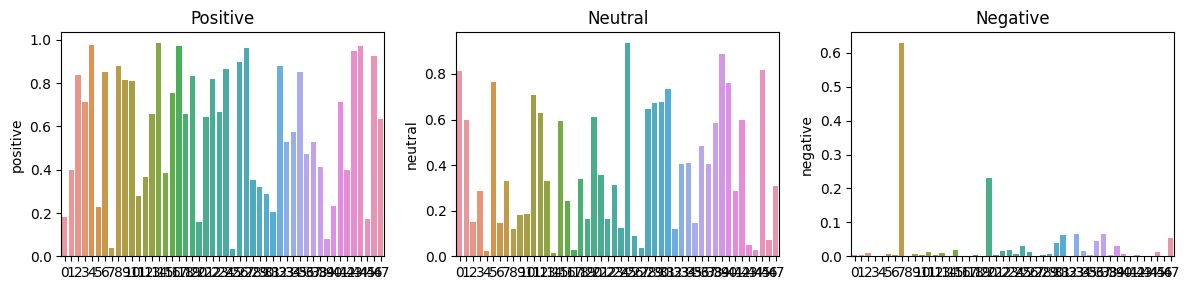

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame 'df', encoded the inputs, and made predictions

def visualize_sentiment_scores(df, scores, labels):
    # Create a DataFrame to store the sentiment scores and labels
    sentiment_df = pd.DataFrame(scores, columns=labels)
    sentiment_df["Text"] = df["Text"].tolist()

    # Merge the sentiment scores with the original DataFrame
    merged_df = pd.concat([df, sentiment_df], axis=1)

    # Create subplots for positive, neutral, and negative sentiment scores
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))

    # Plot positive sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='positive', ax=axs[0])
    axs[0].set_title('Positive')

    # Plot neutral sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='neutral', ax=axs[1])
    axs[1].set_title('Neutral')

    # Plot negative sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='negative', ax=axs[2])
    axs[2].set_title('Negative')

    plt.tight_layout()
    plt.show()

# Call the function to visualize the sentiment scores
visualize_sentiment_scores(df, scores, labels)


# Maserati Formula E

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [ ]:
# Replace with the path to your uploaded dataset
dataset_file_path = "/content/Maserati Formula E.xlsx"

# 1. Load your dataset (assuming it is in an Excel format)
df = pd.read_excel(dataset_file_path)

# 2. Preprocess your text (if needed)
def preprocess(Text):
    # Your preprocessing code here
    return Text

# 3. Tokenize your text
text_column_name = "Text"  # Replace with the actual column name containing the text
df["Text"] = df["Text"].apply(preprocess)  # Apply preprocessing to the text column

# Assuming you have already initialized the tokenizer and model in a previous cell
texts = df[text_column_name].tolist()
encoded_inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)

# 4. Make predictions
with torch.no_grad():
    output = model(**encoded_inputs)
scores = output.logits
scores = softmax(scores, axis=1)

# 5. Interpret the results
for i, Text in enumerate(texts):
    ranking = np.argsort(scores[i])  # Sort in ascending order
    for j in range(scores.shape[1]):
        label = labels[ranking[j]]
        score = scores[i][ranking[j]].item()
        print(f"{i+1}) {Text} | {label}: {score:.4f}")


1) #Maserati has returned to the podium. History was made in Berlin last weekend, but just to recap, this is our: 1st season competing and 1st podium in Formula E. That said, who’s excited for the #MonacoEPrix? Leave a below. #MonacoEPrix #RACEBEYOND  | negative: 0.0075
1) #Maserati has returned to the podium. History was made in Berlin last weekend, but just to recap, this is our: 1st season competing and 1st podium in Formula E. That said, who’s excited for the #MonacoEPrix? Leave a below. #MonacoEPrix #RACEBEYOND  | neutral: 0.2238
1) #Maserati has returned to the podium. History was made in Berlin last weekend, but just to recap, this is our: 1st season competing and 1st podium in Formula E. That said, who’s excited for the #MonacoEPrix? Leave a below. #MonacoEPrix #RACEBEYOND  | positive: 0.7687
2) Maserati is hitting the tracks in Europe for the first time in this E-Prix season. Before reaching Berlin, a lot of preparation happens on and off the track: This time, Formula E driver

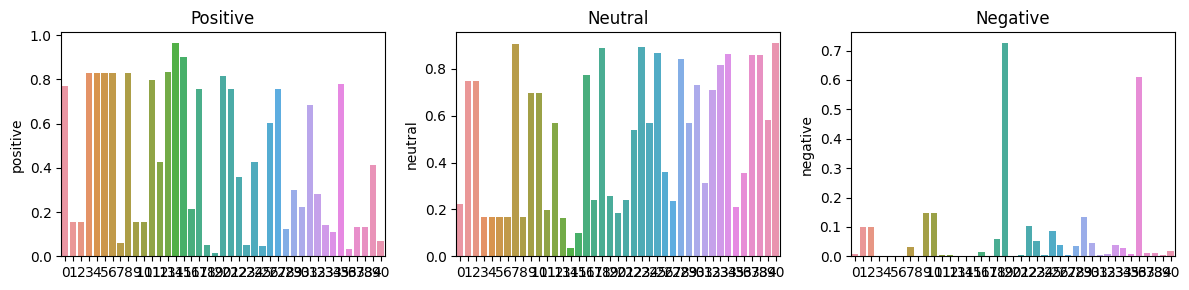

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame 'df', encoded the inputs, and made predictions

def visualize_sentiment_scores(df, scores, labels):
    # Create a DataFrame to store the sentiment scores and labels
    sentiment_df = pd.DataFrame(scores, columns=labels)
    sentiment_df["Text"] = df["Text"].tolist()

    # Merge the sentiment scores with the original DataFrame
    merged_df = pd.concat([df, sentiment_df], axis=1)

    # Create subplots for positive, neutral, and negative sentiment scores
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))

    # Plot positive sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='positive', ax=axs[0])
    axs[0].set_title('Positive')

    # Plot neutral sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='neutral', ax=axs[1])
    axs[1].set_title('Neutral')

    # Plot negative sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='negative', ax=axs[2])
    axs[2].set_title('Negative')

    plt.tight_layout()
    plt.show()

# Call the function to visualize the sentiment scores
visualize_sentiment_scores(df, scores, labels)

Gran Turismo

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [ ]:
# Replace with the path to your uploaded dataset
dataset_file_path = "/content/Maserati GranTurismo Folgore.xlsx"

# 1. Load your dataset (assuming it is in an Excel format)
df = pd.read_excel(dataset_file_path)

# 2. Preprocess your text (if needed)
def preprocess(Text):
    # Your preprocessing code here
    return Text

# 3. Tokenize your text
text_column_name = "Text"  # Replace with the actual column name containing the text
df["Text"] = df["Text"].apply(preprocess)  # Apply preprocessing to the text column

# Assuming you have already initialized the tokenizer and model in a previous cell
texts = df[text_column_name].tolist()
encoded_inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)

# 4. Make predictions
with torch.no_grad():
    output = model(**encoded_inputs)
scores = output.logits
scores = softmax(scores, axis=1)

# 5. Interpret the results
for i, Text in enumerate(texts):
    ranking = np.argsort(scores[i])  # Sort in ascending order
    for j in range(scores.shape[1]):
        label = labels[ranking[j]]
        score = scores[i][ranking[j]].item()
        print(f"{i+1}) {Text} | {label}: {score:.4f}")

1) Set to be available later this year, the GranTurismo Folgore will be launched alongside a petrol version of the car | negative: 0.0028
1) Set to be available later this year, the GranTurismo Folgore will be launched alongside a petrol version of the car | positive: 0.1834
1) Set to be available later this year, the GranTurismo Folgore will be launched alongside a petrol version of the car | neutral: 0.8139
2) Maserati showcases first electric car at Milan design week | negative: 0.0020
2) Maserati showcases first electric car at Milan design week | neutral: 0.2859
2) Maserati showcases first electric car at Milan design week | positive: 0.7120
3) Maserati showcases first electric car at Milan design week | negative: 0.0020
3) Maserati showcases first electric car at Milan design week | neutral: 0.2859
3) Maserati showcases first electric car at Milan design week | positive: 0.7120
4) Maserati showcases first electric car at Milan design week | negative: 0.0020
4) Maserati showcases 

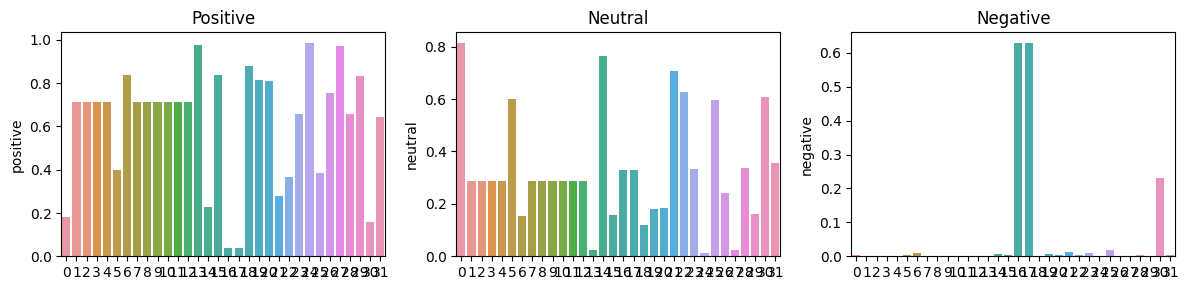

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame 'df', encoded the inputs, and made predictions

def visualize_sentiment_scores(df, scores, labels):
    # Create a DataFrame to store the sentiment scores and labels
    sentiment_df = pd.DataFrame(scores, columns=labels)
    sentiment_df["Text"] = df["Text"].tolist()

    # Merge the sentiment scores with the original DataFrame
    merged_df = pd.concat([df, sentiment_df], axis=1)

    # Create subplots for positive, neutral, and negative sentiment scores
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))

    # Plot positive sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='positive', ax=axs[0])
    axs[0].set_title('Positive')

    # Plot neutral sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='neutral', ax=axs[1])
    axs[1].set_title('Neutral')

    # Plot negative sentiment scores
    sns.barplot(data=merged_df, x=merged_df.index, y='negative', ax=axs[2])
    axs[2].set_title('Negative')

    plt.tight_layout()
    plt.show()

# Call the function to visualize the sentiment scores
visualize_sentiment_scores(df, scores, labels)